In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xg
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the default iris dataset
iris = load_iris()

# Convert it to a pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column
df['target'] = iris.target

# If you want a copy of the dataset
df_copy = df.copy()


In [ ]:
df_copy


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df_copy.dtypes


,0
sepal length (cm),float64
sepal width (cm),float64
petal length (cm),float64
petal width (cm),float64
target,int64


In [ ]:
#check number of records and feilds present in dataset
df_copy.shape
print('Rows ---->',df.shape[0])
print('Columns ---->',df.shape[1])

Rows ----> 150
Columns ----> 5


In [ ]:
#see the descriptive statistics
df_copy.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
#check the space complexicity taken by data
df_copy.size


750

In [ ]:
#checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df_copy.shape #check propertise like shape

(150, 5)

In [ ]:
#check for missing entries
df_copy.isna()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [ ]:
#In each feat,count of missing entries
df_copy.isna().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [ ]:
df_copy.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [ ]:
df_copy.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
#categoriwise frequency of data
df_copy.target.value_counts()

,count
target,
0,50
1,50
2,50


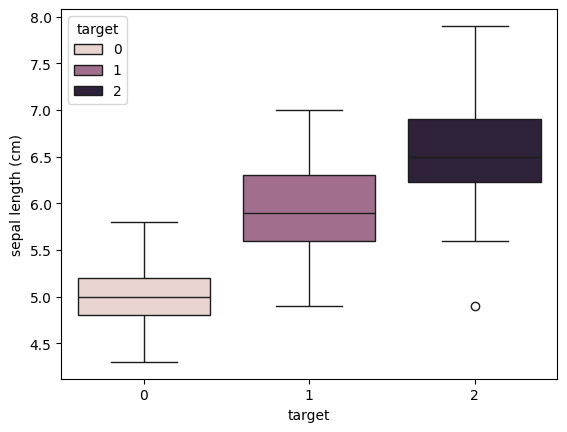

In [ ]:
sns.boxplot(x=df_copy.target, y=df_copy["sepal length (cm)"], data=df_copy, hue=df_copy.target, hue_order=[0, 1, 2])
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

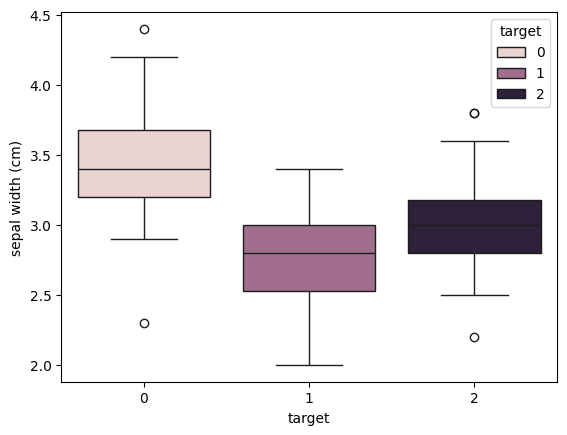

In [ ]:
sns.boxplot(x=df_copy.target, y=df_copy["sepal width (cm)"], data=df_copy, hue=df_copy.target, hue_order=[0, 1, 2])
plt.show

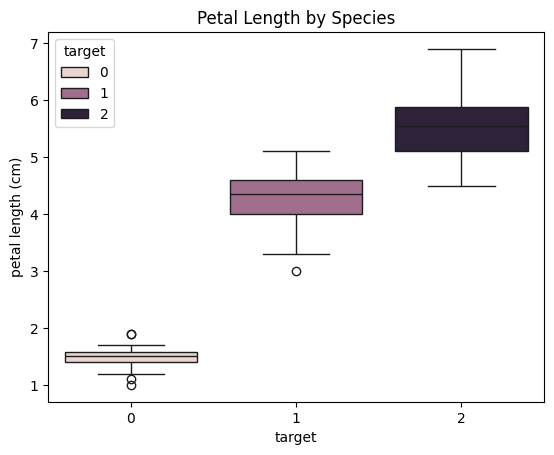

In [ ]:
sns.boxplot(x=df_copy.target, y=df_copy["petal length (cm)"], data=df_copy, hue=df_copy.target, hue_order=[0, 1, 2])
plt.title("Petal Length by Species")
plt.show()


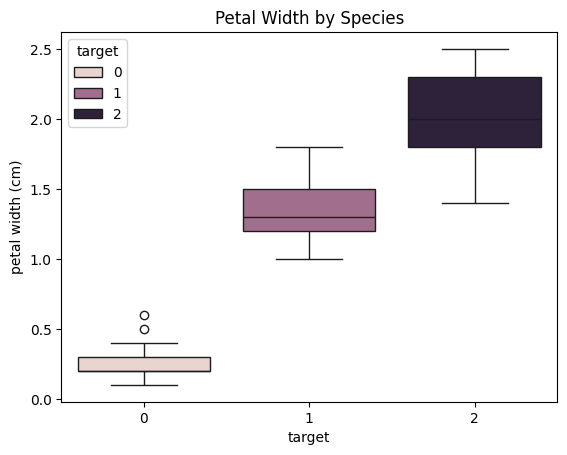

In [ ]:
sns.boxplot(x=df_copy.target, y=df_copy["petal width (cm)"], data=df_copy, hue=df_copy.target, hue_order=[0, 1, 2])
plt.title("Petal Width by Species")
plt.show()


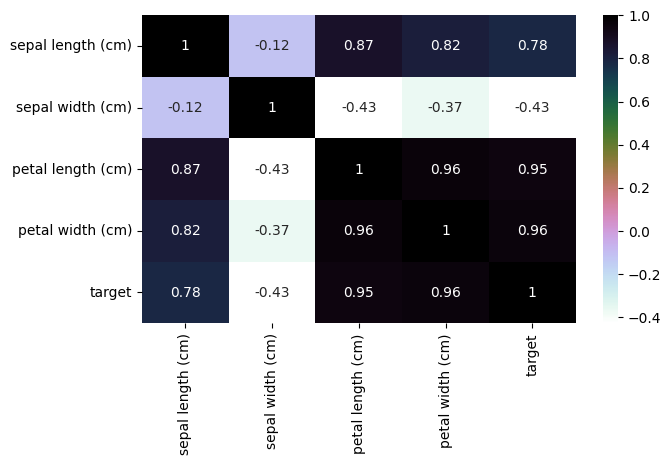

In [ ]:
plt.figure(figsize=(7,4))
sns.heatmap(df_copy.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Creating an instance of label encoder
le = LabelEncoder()

# Encoding the 'target' column
df_copy['target'] = le.fit_transform(df_copy['target'])
df_copy


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
x = df_copy.iloc[:, :-1]
x


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = df_copy.iloc[:, -1]
y


,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
df_copy['target'].unique()


array([0, 1, 2])

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=20)


In [ ]:
xtrain.shape


(105, 4)

In [ ]:
ytrain.shape

(105,)

In [ ]:
xtest.shape


(45, 4)

In [ ]:
ytest.shape


(45,)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=200)

# Train the model on training data
model.fit(xtrain, ytrain)


LogisticRegression(max_iter=200)

In [ ]:
# Predict on test set
ypred = model.predict(xtest)

# Import evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Print evaluation results
print("Accuracy:", accuracy_score(ytest, ypred))
print("\nClassification Report:\n", classification_report(ytest, ypred))
print("\nConfusion Matrix:\n", confusion_matrix(ytest, ypred))


Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92        18
           2       1.00      0.79      0.88        14

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45


Confusion Matrix:
 [[13  0  0]
 [ 0 18  0]
 [ 0  3 11]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model (with k=5 as a common choice)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn_model.fit(xtrain, ytrain)


KNeighborsClassifier()

In [ ]:
# Predict on the test set
ypred_knn = knn_model.predict(xtest)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(ytest, ypred_knn))

# Classification report (precision, recall, f1-score)
print("\nClassification Report:\n", classification_report(ytest, ypred_knn))

# Confusion matrix (to check correct/incorrect classifications)
print("\nConfusion Matrix:\n", confusion_matrix(ytest, ypred_knn))


Accuracy: 0.9555555555555556

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        18
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45


Confusion Matrix:
 [[13  0  0]
 [ 0 17  1]
 [ 0  1 13]]


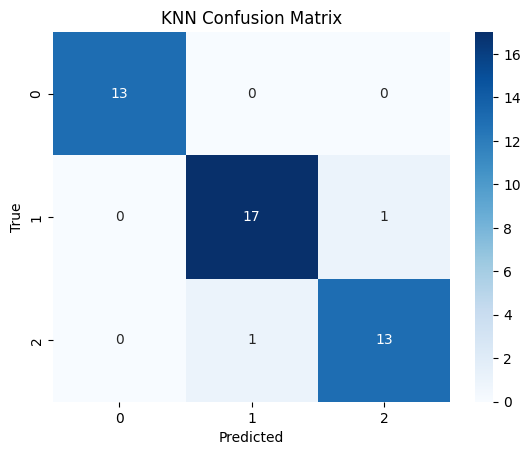

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix as a heatmap
cm = confusion_matrix(ytest, ypred_knn)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('KNN Confusion Matrix')
plt.show()
